In [47]:
import numpy as np
from tqdm import tqdm
import sympy
from sympy import Symbol,Matrix,cos,sin,pi
import matplotlib.pyplot as plt


In [48]:
theta1,theta2,theta3,theta4,theta5,theta6 = sympy.symbols("theta1,theta2,theta3,theta4,theta5,theta6")
end_effector_length = 76.8 # End effector length

In [49]:
def transformation_matrix_from_dh_param(dh_row):
  theta,alpha,a,d = dh_row
  return Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                 [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                 [0,sin(alpha),cos(alpha),d],
                 [0,0,0,1]])


In [50]:
dh_table = Matrix([[theta1,pi/2,0,183.3],
                   [theta2+pi/2,0,737.31,0],
                   [theta3,0,387.8,0],
                   [theta4 + pi/2,pi/2,0,95.5], #added offset for theta4
                   [theta5,-pi/2,0,115.5],
                   [theta6,0,0,end_effector_length]])


In [51]:
sympy.pprint(dh_table)

⎡         π                ⎤
⎢  θ₁     ─     0     183.3⎥
⎢         2                ⎥
⎢                          ⎥
⎢     π                    ⎥
⎢θ₂ + ─   0   737.31    0  ⎥
⎢     2                    ⎥
⎢                          ⎥
⎢  θ₃     0   387.8     0  ⎥
⎢                          ⎥
⎢     π   π                ⎥
⎢θ₄ + ─   ─     0     95.5 ⎥
⎢     2   2                ⎥
⎢                          ⎥
⎢        -π                ⎥
⎢  θ₅    ───    0     115.5⎥
⎢         2                ⎥
⎢                          ⎥
⎣  θ₆     0     0     76.8 ⎦


In [52]:
def calculate_transformation_matrix(dh_table):
  return [transformation_matrix_from_dh_param(dh_table[i:i+4]) for i in range(0,dh_table.rows*4,4)]


In [53]:
frames = ["0","1","2","3","4","5","E"]
transformation_matrix = calculate_transformation_matrix(dh_table)
for i in range(0,len(frames)-1):
  print(f"Transformation matrix between frame {frames[i]} and frame {frames[i+1]}:")
  sympy.pprint(transformation_matrix[i])
  print("------------------------------------------")

Transformation matrix between frame 0 and frame 1:
⎡cos(θ₁)  0  sin(θ₁)     0  ⎤
⎢                           ⎥
⎢sin(θ₁)  0  -cos(θ₁)    0  ⎥
⎢                           ⎥
⎢   0     1     0      183.3⎥
⎢                           ⎥
⎣   0     0     0        1  ⎦
------------------------------------------
Transformation matrix between frame 1 and frame 2:
⎡-sin(θ₂)  -cos(θ₂)  0  -737.31⋅sin(θ₂)⎤
⎢                                      ⎥
⎢cos(θ₂)   -sin(θ₂)  0  737.31⋅cos(θ₂) ⎥
⎢                                      ⎥
⎢   0         0      1         0       ⎥
⎢                                      ⎥
⎣   0         0      0         1       ⎦
------------------------------------------
Transformation matrix between frame 2 and frame 3:
⎡cos(θ₃)  -sin(θ₃)  0  387.8⋅cos(θ₃)⎤
⎢                                   ⎥
⎢sin(θ₃)  cos(θ₃)   0  387.8⋅sin(θ₃)⎥
⎢                                   ⎥
⎢   0        0      1        0      ⎥
⎢                                   ⎥
⎣   0        0      0        1      

In [54]:
def forward_kinematics(transformation_matrix):
  tranform_from_base = []
  matrix = Matrix([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,0],
                  [0,0,0,1]])
  for transform in transformation_matrix:
    matrix = matrix.multiply(transform,dotprodsimp=True)
    tranform_from_base.append(matrix)
  return matrix,tranform_from_base

In [55]:
homogeneous1_E,transform_from_base = forward_kinematics(transformation_matrix)
print("Final transform from 0 to E:")
homogeneous1_E

Final transform from 0 to E:


Matrix([
[ sin(theta1)*sin(theta5)*cos(theta6) - sin(theta2)*sin(theta3)*sin(theta4)*sin(theta6)*cos(theta1) + sin(theta2)*sin(theta3)*cos(theta1)*cos(theta4)*cos(theta5)*cos(theta6) + sin(theta2)*sin(theta4)*cos(theta1)*cos(theta3)*cos(theta5)*cos(theta6) + sin(theta2)*sin(theta6)*cos(theta1)*cos(theta3)*cos(theta4) + sin(theta3)*sin(theta4)*cos(theta1)*cos(theta2)*cos(theta5)*cos(theta6) + sin(theta3)*sin(theta6)*cos(theta1)*cos(theta2)*cos(theta4) + sin(theta4)*sin(theta6)*cos(theta1)*cos(theta2)*cos(theta3) - cos(theta1)*cos(theta2)*cos(theta3)*cos(theta4)*cos(theta5)*cos(theta6), -sin(theta1)*sin(theta5)*sin(theta6) - sin(theta2)*sin(theta3)*sin(theta4)*cos(theta1)*cos(theta6) - sin(theta2)*sin(theta3)*sin(theta6)*cos(theta1)*cos(theta4)*cos(theta5) - sin(theta2)*sin(theta4)*sin(theta6)*cos(theta1)*cos(theta3)*cos(theta5) + sin(theta2)*cos(theta1)*cos(theta3)*cos(theta4)*cos(theta6) - sin(theta3)*sin(theta4)*sin(theta6)*cos(theta1)*cos(theta2)*cos(theta5) + sin(theta3)*cos(theta1)

In [56]:
#Evaluation at home position
home_position = homogeneous1_E.evalf(subs={theta1:0,theta2:0,theta3:0,theta4:0,theta5:0,theta6:0})
print("Evaluation at home position")
sympy.pprint(homogeneous1_E.evalf(subs={theta1:0,theta2:0,theta3:0,theta4:0,theta5:0,theta6:0}))
pose = {theta1:0,theta2:0,theta3:0,theta4:0,theta5:0,theta6:0}
#Evaluation by changing other theta values
for theta,val in pose.items():
  print(f"Evaluation at {theta} set to 90 degrees position")
  evaluation_pose = pose.copy()
  evaluation_pose[theta]=pi/2
  sympy.pprint(homogeneous1_E.evalf(subs=evaluation_pose))

Evaluation at home position
⎡-1.0   0     0       0   ⎤
⎢                         ⎥
⎢ 0     0    -1.0  -172.3 ⎥
⎢                         ⎥
⎢ 0    -1.0   0    1423.91⎥
⎢                         ⎥
⎣ 0     0     0      1.0  ⎦
Evaluation at theta1 set to 90 degrees position
⎡0.e-2737   0      1.0     172.3  ⎤
⎢                                 ⎥
⎢  -1.0     0    0.e-678  0.e-1199⎥
⎢                                 ⎥
⎢   0      -1.0     0     1423.91 ⎥
⎢                                 ⎥
⎣   0       0       0       1.0   ⎦
Evaluation at theta2 set to 90 degrees position
⎡-0.e-1510     1.0      0    -1240.61⎤
⎢                                    ⎥
⎢    0          0      -1.0   -172.3 ⎥
⎢                                    ⎥
⎢  -1.0     -0.e-1598   0     183.3  ⎥
⎢                                    ⎥
⎣    0          0       0      1.0   ⎦
Evaluation at theta3 set to 90 degrees position
⎡-0.e-1510     1.0      0    -503.3⎤
⎢                                  ⎥
⎢    0          0      -1.0  -172

In [57]:
# Since we had a dummy frame between 1 and 2, we have to multiply transform1_D and transformD_2 to get transform1_2
# transform_from_base is list of transforms of [transform1_D,transform1_2,transform1_3,transform1_4,transform1_5,transform1_6]
# Thus we consider the list from second element of list
# new_transform_from_base =  transform_from_base[1:].copy()  #Substituting back the transform in list
new_transform_from_base = transform_from_base

In [58]:
P_1_E = Matrix([homogeneous1_E[3],homogeneous1_E[7],homogeneous1_E[11]]) # position of end effector

In [59]:
p_jacobian = P_1_E.jacobian([theta1,theta2,theta3,theta4,theta5,theta6])

In [60]:
z= Matrix()
for transform in new_transform_from_base:
  # Getting the third column from all transforms to form the Z matrix
  z=z.row_join(Matrix([[transform[2]],[transform[6]],[transform[10]]]))


In [61]:
print("Z matrix :")
sympy.pprint(z)

Z matrix :
⎡sin(θ₁)   sin(θ₁)   sin(θ₁)   sin(θ₂)⋅sin(θ₃)⋅sin(θ₄)⋅cos(θ₁) - sin(θ₂)⋅cos(θ ↪
⎢                                                                              ↪
⎢-cos(θ₁)  -cos(θ₁)  -cos(θ₁)  sin(θ₁)⋅sin(θ₂)⋅sin(θ₃)⋅sin(θ₄) - sin(θ₁)⋅sin(θ ↪
⎢                                                                              ↪
⎣   0         0         0                     -sin(θ₂)⋅sin(θ₃)⋅cos(θ₄) - sin(θ ↪

↪ ₁)⋅cos(θ₃)⋅cos(θ₄) - sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₁)⋅cos(θ ↪
↪                                                                              ↪
↪ ₂)⋅cos(θ₃)⋅cos(θ₄) - sin(θ₁)⋅sin(θ₃)⋅cos(θ₂)⋅cos(θ₄) - sin(θ₁)⋅sin(θ₄)⋅cos(θ ↪
↪                                                                              ↪
↪ ₂)⋅sin(θ₄)⋅cos(θ₃) - sin(θ₃)⋅sin(θ₄)⋅cos(θ₂) + cos(θ₂)⋅cos(θ₃)⋅cos(θ₄)       ↪

↪ ₂)⋅cos(θ₃)  sin(θ₁)⋅cos(θ₅) - sin(θ₂)⋅sin(θ₃)⋅sin(θ₅)⋅cos(θ₁)⋅cos(θ₄) - sin( ↪
↪                                                                              ↪
↪ ₂)⋅cos(θ₃)  -

In [62]:
jacobian = p_jacobian.col_join(z)
print(jacobian)
jacobian

Matrix([[-115.5*sin(theta1)*sin(theta2)*sin(theta3)*sin(theta4) + 76.8*sin(theta1)*sin(theta2)*sin(theta3)*sin(theta5)*cos(theta4) + 76.8*sin(theta1)*sin(theta2)*sin(theta4)*sin(theta5)*cos(theta3) + 115.5*sin(theta1)*sin(theta2)*cos(theta3)*cos(theta4) + 387.8*sin(theta1)*sin(theta2)*cos(theta3) + 737.31*sin(theta1)*sin(theta2) + 76.8*sin(theta1)*sin(theta3)*sin(theta4)*sin(theta5)*cos(theta2) + 115.5*sin(theta1)*sin(theta3)*cos(theta2)*cos(theta4) + 387.8*sin(theta1)*sin(theta3)*cos(theta2) + 115.5*sin(theta1)*sin(theta4)*cos(theta2)*cos(theta3) - 76.8*sin(theta1)*sin(theta5)*cos(theta2)*cos(theta3)*cos(theta4) + 76.8*cos(theta1)*cos(theta5) + 95.5*cos(theta1), 76.8*sin(theta2)*sin(theta3)*sin(theta4)*sin(theta5)*cos(theta1) + 115.5*sin(theta2)*sin(theta3)*cos(theta1)*cos(theta4) + 387.8*sin(theta2)*sin(theta3)*cos(theta1) + 115.5*sin(theta2)*sin(theta4)*cos(theta1)*cos(theta3) - 76.8*sin(theta2)*sin(theta5)*cos(theta1)*cos(theta3)*cos(theta4) + 115.5*sin(theta3)*sin(theta4)*cos(thet

Matrix([
[-115.5*sin(theta1)*sin(theta2)*sin(theta3)*sin(theta4) + 76.8*sin(theta1)*sin(theta2)*sin(theta3)*sin(theta5)*cos(theta4) + 76.8*sin(theta1)*sin(theta2)*sin(theta4)*sin(theta5)*cos(theta3) + 115.5*sin(theta1)*sin(theta2)*cos(theta3)*cos(theta4) + 387.8*sin(theta1)*sin(theta2)*cos(theta3) + 737.31*sin(theta1)*sin(theta2) + 76.8*sin(theta1)*sin(theta3)*sin(theta4)*sin(theta5)*cos(theta2) + 115.5*sin(theta1)*sin(theta3)*cos(theta2)*cos(theta4) + 387.8*sin(theta1)*sin(theta3)*cos(theta2) + 115.5*sin(theta1)*sin(theta4)*cos(theta2)*cos(theta3) - 76.8*sin(theta1)*sin(theta5)*cos(theta2)*cos(theta3)*cos(theta4) + 76.8*cos(theta1)*cos(theta5) + 95.5*cos(theta1), 76.8*sin(theta2)*sin(theta3)*sin(theta4)*sin(theta5)*cos(theta1) + 115.5*sin(theta2)*sin(theta3)*cos(theta1)*cos(theta4) + 387.8*sin(theta2)*sin(theta3)*cos(theta1) + 115.5*sin(theta2)*sin(theta4)*cos(theta1)*cos(theta3) - 76.8*sin(theta2)*sin(theta5)*cos(theta1)*cos(theta3)*cos(theta4) + 115.5*sin(theta3)*sin(theta4)*cos(the

In [63]:
#sympy.pprint(jacobian)

In [64]:
i = 0
for m in range(6):
  for j in range(6):
    print(f"{i+1})Jacobian matrix element[{m},{j}]:",jacobian[i])
    print("-------------------------------------------------------------------------")
    i+=1

1)Jacobian matrix element[0,0]: -115.5*sin(theta1)*sin(theta2)*sin(theta3)*sin(theta4) + 76.8*sin(theta1)*sin(theta2)*sin(theta3)*sin(theta5)*cos(theta4) + 76.8*sin(theta1)*sin(theta2)*sin(theta4)*sin(theta5)*cos(theta3) + 115.5*sin(theta1)*sin(theta2)*cos(theta3)*cos(theta4) + 387.8*sin(theta1)*sin(theta2)*cos(theta3) + 737.31*sin(theta1)*sin(theta2) + 76.8*sin(theta1)*sin(theta3)*sin(theta4)*sin(theta5)*cos(theta2) + 115.5*sin(theta1)*sin(theta3)*cos(theta2)*cos(theta4) + 387.8*sin(theta1)*sin(theta3)*cos(theta2) + 115.5*sin(theta1)*sin(theta4)*cos(theta2)*cos(theta3) - 76.8*sin(theta1)*sin(theta5)*cos(theta2)*cos(theta3)*cos(theta4) + 76.8*cos(theta1)*cos(theta5) + 95.5*cos(theta1)
-------------------------------------------------------------------------
2)Jacobian matrix element[0,1]: 76.8*sin(theta2)*sin(theta3)*sin(theta4)*sin(theta5)*cos(theta1) + 115.5*sin(theta2)*sin(theta3)*cos(theta1)*cos(theta4) + 387.8*sin(theta2)*sin(theta3)*cos(theta1) + 115.5*sin(theta2)*sin(theta4)*cos

In [65]:
def plot(t1,t2,t3,t4,t5,t6):
  pose = {theta1:t1,theta2:t2,theta3:t3,theta4:t4,theta5:t5,theta6:t6}
  x = [0]+[transform_from_base[i][3].evalf(subs=pose) for i in range(len(transform_from_base))]
  y =  [0]+[transform_from_base[i][7].evalf(subs=pose) for i in range(len(transform_from_base))]
  z =  [0]+[transform_from_base[i][11].evalf(subs=pose) for i in range(len(transform_from_base))]
  fig = plt.figure()
  k = len(transform_from_base)
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(x,y,z)
  ax.set_xlabel('x-axis')
  ax.set_ylabel('y-axis')
  ax.set_zlabel('z-axis')
  ax.set_xlim(xmin=-1000, xmax=1000)
  ax.set_ylim(ymin=-1000, ymax=1000)
  ax.set_zlim(zmin=0, zmax=1500)
  plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [66]:
def get_velocity(inp_t,stepsize):
  T = 20
  t_ = inp_t*stepsize
  r =  50
  t1 = 8.8
  t2 = 11.6
  t3 = 17.2
  w = pi/t1
  if (t_>= 0 and t_< t1):
    vel_matrix = Matrix([-w*r*sin(w*t_),0,w*r*cos(w*t_),0,0,0])
  elif(t_>=t1 and t_<t2):
    vel_matrix = Matrix([0,0,-50/(t2-t1),0,0,0])
  elif(t_>=t2 and t_<t3):
    vel_matrix = Matrix([100/(t3-t2),0,0,0,0,0])
  elif(t_>=t3 and t_<=T):
    vel_matrix = Matrix([0,0,50/(T-t3),0,0,0])
  else:
    vel_matrix = Matrix([0,0,0,0,0,0])
  return vel_matrix.evalf()


<Figure size 640x480 with 0 Axes>

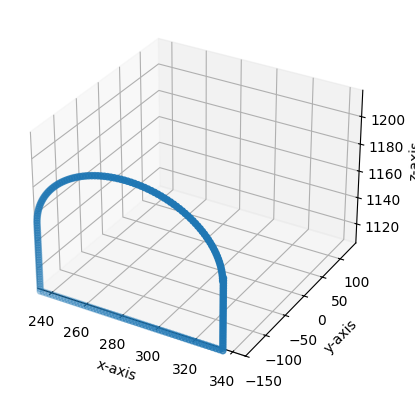

In [ ]:
Time = 20 # We are completing the figure in 20 seconds, 1 second = 10 timestep
t1,t2,t3,t4,t5,t6 = 0,-pi/4,pi/3,pi/6,0.000000001,0.000000  # Start point or the 'S'

x = []
y = []
z = []
dis = 0
stepsize = 0.1
for t in range(int(Time/stepsize)+1):
  vel_matrix = get_velocity(t,stepsize)
  inverse_jacobian = jacobian.evalf(subs={theta1:t1,theta2:t2,theta3:t3,theta4:t4,theta5:t5,theta6:t6}).inv()
  ang_vel = inverse_jacobian.multiply(vel_matrix)
  t1 = t1 + ang_vel[0]*stepsize
  t2 = t2 + ang_vel[1]*stepsize
  t3 = t3 + ang_vel[2]*stepsize
  t4 = t4 + ang_vel[3]*stepsize
  t5 = t5 + ang_vel[4]*stepsize
  t6 = t6 + ang_vel[5]*stepsize

  values = homogeneous1_E.evalf(subs={theta1:t1,theta2:t2,theta3:t3,theta4:t4,theta5:t5,theta6:t6}).col(3)
  x.append(values[0])
  y.append(values[1])
  z.append(values[2])
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_ylim(ymin=-150, ymax=145)
plt.savefig("plot.png")